<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [ ]:
student_number = '99105429'
first_name = 'Amirhossein'
last_name = 'Khoshbakht'

     pcost       dcost       gap    pres   dres
 0: -6.1265e+02 -3.3971e+03  2e+04  3e+00  2e-13
 1: -4.1824e+02 -2.2816e+03  3e+03  3e-01  2e-13
 2: -3.9732e+02 -7.6474e+02  4e+02  3e-02  1e-13
 3: -4.4111e+02 -5.8227e+02  2e+02  9e-03  1e-13
 4: -4.6125e+02 -5.3708e+02  8e+01  4e-03  1e-13
 5: -4.7293e+02 -5.1305e+02  4e+01  2e-03  1e-13
 6: -4.7763e+02 -5.0407e+02  3e+01  1e-03  1e-13
 7: -4.8272e+02 -4.9477e+02  1e+01  4e-04  1e-13
 8: -4.8534e+02 -4.9054e+02  5e+00  2e-04  1e-13
 9: -4.8671e+02 -4.8840e+02  2e+00  4e-05  1e-13
10: -4.8718e+02 -4.8773e+02  6e-01  7e-06  1e-13
11: -4.8738e+02 -4.8747e+02  9e-02  4e-07  1e-13
12: -4.8742e+02 -4.8743e+02  7e-03  3e-08  1e-13
13: -4.8742e+02 -4.8742e+02  2e-04  6e-10  2e-13
Optimal solution found.
Accuracy:  0.8252788104089219
Balanced Accuracy:  0.7639855133496167
Confusion Matrix:
 [[348  35]
 [ 59  96]]


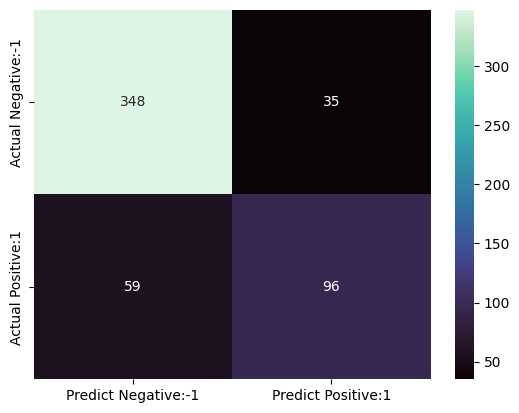

     pcost       dcost       gap    pres   dres
 0: -6.6231e+02 -3.1520e+03  1e+04  3e+00  2e-14
 1: -4.4592e+02 -2.0464e+03  2e+03  9e-02  2e-14
 2: -5.0504e+02 -7.6884e+02  3e+02  1e-02  2e-14
 3: -5.7545e+02 -6.4494e+02  7e+01  2e-03  2e-14
 4: -5.9360e+02 -6.2011e+02  3e+01  7e-04  2e-14
 5: -6.0005e+02 -6.1118e+02  1e+01  2e-04  2e-14
 6: -6.0344e+02 -6.0671e+02  3e+00  5e-05  2e-14
 7: -6.0474e+02 -6.0510e+02  4e-01  4e-06  2e-14
 8: -6.0489e+02 -6.0492e+02  3e-02  2e-07  2e-14
 9: -6.0491e+02 -6.0491e+02  9e-04  7e-09  2e-14
10: -6.0491e+02 -6.0491e+02  1e-05  1e-10  2e-14
Optimal solution found.
Accuracy:  0.7727272727272727
Balanced Accuracy:  0.6913291354663036
Confusion Matrix:
 [[206  20]
 [ 55  49]]
     pcost       dcost       gap    pres   dres
 0: -5.7870e+02 -3.1897e+03  2e+04  3e+00  2e-14
 1: -4.0863e+02 -2.0634e+03  2e+03  2e-01  1e-14
 2: -4.2109e+02 -6.8997e+02  3e+02  2e-02  1e-14
 3: -4.6476e+02 -5.9584e+02  1e+02  8e-03  1e-14
 4: -4.8769e+02 -5.5091e+02  7e+01

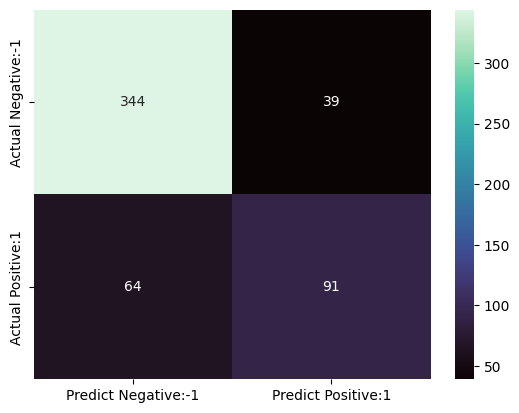

Accuracy:  0.9092604101926662
Balanced Accuracy:  0.8880046622293033
Confusion Matrix:
 [[352   0   1   0   2   0]
 [  0 183   1   0   3   2]
 [  3   0 322  12   0   5]
 [  3   4  31  94   3  20]
 [  1   1   1   1 173   8]
 [  0   0   8  31   5 339]]


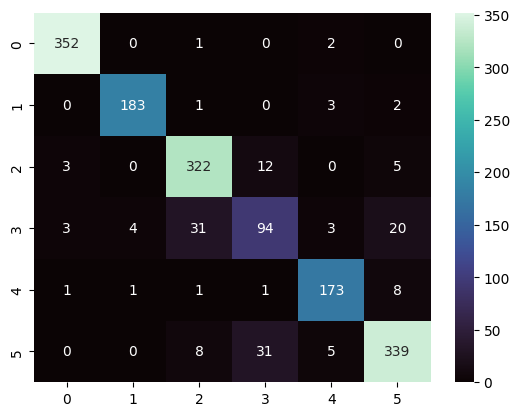

In [3]:
# Data Preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('satimage.csv')
X = data.drop(columns=['label'])
y = data['label']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.60, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.375, random_state=42)  # 0.375 * 0.4 = 0.15

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Binary SVM (labels 4 and 6)
binary_indices = (y_train == 4) | (y_train == 6)
X_train_binary = X_train[binary_indices]
y_train_binary = y_train[binary_indices]
y_train_binary = y_train_binary.apply(lambda x: 1 if x == 4 else -1)

binary_indices_val = (y_val == 4) | (y_val == 6)
X_val_binary = X_val[binary_indices_val]
y_val_binary = y_val[binary_indices_val]
y_val_binary = y_val_binary.apply(lambda x: 1 if x == 4 else -1)

binary_indices_test = (y_test == 4) | (y_test == 6)
X_test_binary = X_test[binary_indices_test]
y_test_binary = y_test[binary_indices_test]
y_test_binary = y_test_binary.apply(lambda x: 1 if x == 4 else -1)

# Model
from cvxopt import matrix, solvers

def soft_margin_svm(X, y, C):
    n_samples, n_features = X.shape
    K = np.dot(X, X.T)
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    solvers.options['show_progress'] = True
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])

    support_vector_indices = alphas > 1e-5
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]

    return support_vectors, support_vector_labels, support_vector_alphas

C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train_binary, y_train_binary.to_numpy(), C)

def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    y_pred = np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        s = 0
        for alpha, sv_y, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
            s += alpha * sv_y * np.dot(x_test[i], sv)
        y_pred[i] = s
    return np.sign(y_pred)

y_pred = predict_labels(np.array(X_test_binary), support_vectors, support_vector_labels, support_vector_alphas)

# Evaluation
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat

_, _, confusion_mat = evaluate(y_test_binary, y_pred)

cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                         index=['Actual Negative:-1', 'Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

# Fine-tuning
def rbf(x1, x2, gamma=1):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

def soft_margin_svm_rbf(X, y, C, gamma=1):
    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf(X[i], X[j], gamma)
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])

    support_vector_indices = alphas > 1e-5
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]

    return support_vectors, support_vector_labels, support_vector_alphas

gammas = [0.001, 0.01, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None
best_balanced_accuracy = 0

for gamma in gammas:
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm_rbf(X_train_binary, y_train_binary.to_numpy(), C, gamma)
    y_pred_val = predict_labels(np.array(X_val_binary), support_vectors, support_vector_labels, support_vector_alphas)
    _, balanced_accuracy, _ = evaluate(y_val_binary, y_pred_val)
    if balanced_accuracy > best_balanced_accuracy:
        best_balanced_accuracy = balanced_accuracy
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas

print(best_gamma)

y_pred = predict_labels(np.array(X_test_binary), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test_binary, y_pred)
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                         index=['Actual Negative:-1', 'Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

# Multiclass SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]

param_grid = {'C': Cs, 'gamma': gammas}
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svc = grid_search.best_estimator_

y_pred = best_svc.predict(X_test)
_, _, confusion_mat = evaluate(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='mako')
plt.show()


# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Prepfocessing

Import your needed libraries in following cell.

In [ ]:
# TODO: Write your code here

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable.

In [ ]:
# TODO: Write your code here

Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [ ]:
# TODO: Write your code here

We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [ ]:
# TODO: Write your code here

# Model (50 points)

Here is soft margin svm convex optimization formulation.
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

`TODO: Write Here`

Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [ ]:
def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here

    support_vectors = None
    support_vector_labels = None
    support_vector_alphas = None

    return support_vectors, support_vector_labels, support_vector_alphas

In [ ]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(x_train, y_train, C)

     pcost       dcost       gap    pres   dres
 0: -6.1265e+02 -3.3971e+03  2e+04  3e+00  2e-13
 1: -4.1824e+02 -2.2816e+03  3e+03  3e-01  1e-13
 2: -3.9732e+02 -7.6474e+02  4e+02  3e-02  8e-14
 3: -4.4111e+02 -5.8227e+02  2e+02  9e-03  7e-14
 4: -4.6125e+02 -5.3708e+02  8e+01  4e-03  7e-14
 5: -4.7293e+02 -5.1305e+02  4e+01  2e-03  7e-14
 6: -4.7763e+02 -5.0407e+02  3e+01  1e-03  6e-14
 7: -4.8272e+02 -4.9477e+02  1e+01  4e-04  7e-14
 8: -4.8534e+02 -4.9054e+02  5e+00  2e-04  7e-14
 9: -4.8671e+02 -4.8840e+02  2e+00  4e-05  7e-14
10: -4.8718e+02 -4.8773e+02  6e-01  7e-06  8e-14
11: -4.8738e+02 -4.8747e+02  9e-02  4e-07  8e-14
12: -4.8742e+02 -4.8743e+02  7e-03  3e-08  8e-14
13: -4.8742e+02 -4.8742e+02  2e-04  6e-10  8e-14
Optimal solution found.


In [ ]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    output:
        y_pred: predictoin labels
    """

    # TODO: Write your code here

    y_pred = None
    return y_pred

In [ ]:
y_pred = predict_labels(np.array(x_test), support_vectors, support_vector_labels, support_vector_alphas)

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [ ]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = None
    balanced_accuracy = None
    confusion_mat = None

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.8024357239512855
Balanced Accuracy:  0.7372659691629956
Confusion Matrix:
 [[129  98]
 [ 48 464]]


<Axes: >

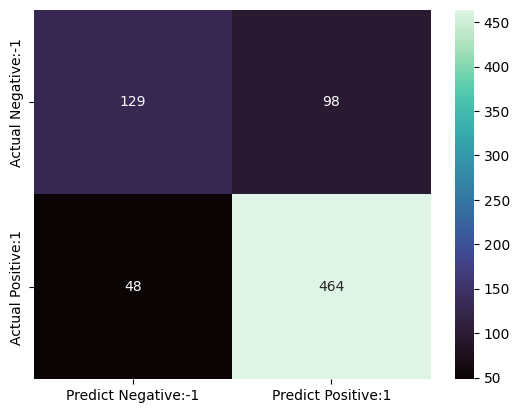

In [ ]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [ ]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    output = None
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here

    support_vectors = None
    support_vector_labels = None
    support_vector_alphas = None

    return support_vectors, support_vector_labels, support_vector_alphas

In [ ]:
gammas = [00.1, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None

# TODO: Write your code here

print(best_gamma)

gamma =  0.1


     pcost       dcost       gap    pres   dres
 0: -4.6331e+02 -2.1253e+03  2e+03  2e-12  6e-16
 1: -4.6978e+02 -5.0577e+02  4e+01  6e-14  1e-16
 2: -4.7552e+02 -4.7591e+02  4e-01  8e-15  8e-17
 3: -4.7559e+02 -4.7559e+02  4e-03  5e-14  8e-17
 4: -4.7559e+02 -4.7559e+02  4e-05  6e-14  1e-16
Optimal solution found.
gamma =  0.1
     pcost       dcost       gap    pres   dres
 0: -4.6331e+02 -2.1253e+03  2e+03  2e-12  6e-16
 1: -4.6978e+02 -5.0577e+02  4e+01  6e-14  1e-16
 2: -4.7552e+02 -4.7591e+02  4e-01  8e-15  8e-17
 3: -4.7559e+02 -4.7559e+02  4e-03  5e-14  8e-17
 4: -4.7559e+02 -4.7559e+02  4e-05  6e-14  1e-16
Optimal solution found.
gamma =  1
     pcost       dcost       gap    pres   dres
 0: -2.2807e+02 -2.3860e+03  1e+04  2e+00  1e-15
 1: -1.9511e+02 -1.3394e+03  1e+03  1e-01  6e-16
 2: -2.1236e+02 -4.1488e+02  2e+02  2e-02  8e-16
 3: -2.3269e+02 -2.8889e+02  6e+01  3e-03  6e-16
 4: -2.4128e+02 -2.5379e+02  1e+01  2e-04  5e-16
 5: -2.4336e+02 -2.4664e+02  3e+00  2e-05  5e-16


In [ ]:
y_pred = predict_labels(np.array(x_test), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test, y_pred)

     pcost       dcost       gap    pres   dres
 0: -2.2807e+02 -2.3860e+03  1e+04  2e+00  1e-15
 1: -1.9511e+02 -1.3394e+03  1e+03  1e-01  6e-16
 2: -2.1236e+02 -4.1488e+02  2e+02  2e-02  8e-16
 3: -2.3269e+02 -2.8889e+02  6e+01  3e-03  6e-16
 4: -2.4128e+02 -2.5379e+02  1e+01  2e-04  5e-16
 5: -2.4336e+02 -2.4664e+02  3e+00  2e-05  5e-16
 6: -2.4396e+02 -2.4482e+02  9e-01  2e-06  5e-16
 7: -2.4412e+02 -2.4439e+02  3e-01  7e-15  5e-16
 8: -2.4419e+02 -2.4423e+02  4e-02  4e-15  5e-16
 9: -2.4420e+02 -2.4420e+02  9e-04  7e-16  5e-16
10: -2.4420e+02 -2.4420e+02  1e-05  8e-15  5e-16
Optimal solution found.
Accuracy:  0.7753721244925575
Balanced Accuracy:  0.677274056993392
Confusion Matrix:
 [[ 96 131]
 [ 35 477]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [ ]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
# TODO: Write your code here

Implement Multiclass SVM from scratch without using ready functions (optional).

In [ ]:
# TODO: Write your code here

# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

In [ ]:
# TODO: Write your code here

Accuracy:  0.8673982624599909
Balanced Accuracy:  0.8296118784587972
Confusion Matrix:
 [[498   0   3   0   3   0]
 [  0 228   1   0  17   0]
 [  7   0 435  17   0   1]
 [  3   1  52 102   5  64]
 [  9   9   0   2 191  27]
 [  0   0  10  45  14 443]]


### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part.

In [ ]:
# TODO: Write your code here

Accuracy:  0.8920896204846822
Balanced Accuracy:  0.8670985916367675
Confusion Matrix:
 [[498   1   4   0   1   0]
 [  0 240   0   1   4   1]
 [  4   0 441   9   0   6]
 [  3   2  55 127   3  37]
 [  6   2   1   2 205  22]
 [  0   1  13  47  11 440]]


### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

In [ ]:
# TODO: Write your code here

Accuracy:  0.8920896204846822
Balanced Accuracy:  0.8670985916367675
Confusion Matrix:
 [[498   1   4   0   1   0]
 [  0 240   0   1   4   1]
 [  4   0 441   9   0   6]
 [  3   2  55 127   3  37]
 [  6   2   1   2 205  22]
 [  0   1  13  47  11 440]]


### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

In [ ]:
# TODO: Write your code here

Accuracy:  0.7192501143118427
Balanced Accuracy:  0.6737052742237154
Confusion Matrix:
 [[418   7  26   0  53   0]
 [ 30 210   0   1   5   0]
 [  4   0 416  38   1   1]
 [  4   2  61  61  19  80]
 [ 26  42   6  35 121   8]
 [  0   1  12  82  70 347]]


Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one?

`TODO: Write Here`